In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
chocolate_df = pd.read_csv("/content/Chocolate_data.csv")

In [3]:
chocolate_df.head(30)

,id,company_location,country_of_bean_origin,cocoa_percent,rating,sweet,nutty,cocoa,roasty,earthy,...,rich,dried.fruit,ingredient_Beans,ingredient_Sugar,ingredient_Sweetener,ingredient_Cocoa_Butter,ingredient_vanilla,ingredient_lecithin,ingredient_salt,number_of_ingredients
0,1,U.S.A.,Tanzania,76.0,3.25,No,No,Yes,No,No,...,Yes,No,Yes,Yes,Yes,Yes,No,No,No,3.0
1,2,U.S.A.,Dominican Republic,76.0,3.50,No,No,Yes,No,No,...,No,No,Yes,Yes,Yes,Yes,No,No,No,3.0
2,3,U.S.A.,Madagascar,76.0,3.75,No,No,Yes,No,No,...,No,No,Yes,Yes,Yes,Yes,No,No,No,3.0
3,4,U.S.A.,Other,68.0,3.00,No,No,No,No,No,...,No,No,Yes,Yes,Yes,Yes,No,No,No,3.0
4,5,U.S.A.,Other,80.0,3.25,No,No,Yes,No,No,...,No,No,Yes,Yes,Yes,Yes,No,No,No,3.0
5,6,France,Bolivia,70.0,3.50,No,Yes,No,No,No,...,No,No,Yes,Yes,Yes,Yes,No,Yes,No,4.0
6,7,France,Peru,63.0,3.75,No,No,No,Yes,No,...,No,No,Yes,Yes,Yes,Yes,No,Yes,No,4.0
7,8,France,Other,70.0,2.75,No,Yes,No,No,Yes,...,No,No,Yes,Yes,Yes,Yes,No,Yes,No,4.0
8,9,France,Colombia,70.0,2.75,No,No,No,No,No,...,No,No,Yes,Yes,Yes,Yes,No,Yes,No,4.0
9,10,France,Other,70.0,3.00,No,No,No,No,No,...,No,No,Yes,Yes,Yes,Yes,No,Yes,No,4.0


In [4]:
chocolate_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2130 entries, 0 to 2129
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       2130 non-null   int64  
 1   company_location         2130 non-null   object 
 2   country_of_bean_origin   2130 non-null   object 
 3   cocoa_percent            2130 non-null   float64
 4   rating                   2130 non-null   float64
 5   sweet                    2130 non-null   object 
 6   nutty                    2130 non-null   object 
 7   cocoa                    2130 non-null   object 
 8   roasty                   2130 non-null   object 
 9   earthy                   2130 non-null   object 
 10  creamy                   2130 non-null   object 
 11  sandy                    2130 non-null   object 
 12  fatty                    2130 non-null   object 
 13  floral                   2130 non-null   object 
 14  intense                 

**Checking null values in DF**

In [23]:
chocolate_df.isnull().sum()

# using a for loop
for column in chocolate_df.columns:
    print(column)
    print(chocolate_df[column].isnull().sum())

id
0
company_location
0
country_of_bean_origin
0
cocoa_percent
0
rating
0
sweet
0
nutty
0
cocoa
0
roasty
0
earthy
0
creamy
0
sandy
0
fatty
0
floral
0
intense
0
spicy
0
sour
0
vanilla
0
fruit
0
molasses
0
woody
0
sticky
0
coffee
0
rich
0
dried.fruit
0
ingredient_Beans
0
ingredient_Sugar
0
ingredient_Sweetener
0
ingredient_Cocoa_Butter
0
ingredient_vanilla
0
ingredient_lecithin
0
ingredient_salt
0
number_of_ingredients
70
cocoa_precent_bin
0
new_number_of_ingredients
0


In [6]:
chocolate_df.describe()

,id,cocoa_percent,rating,number_of_ingredients
count,2130.000000,2130.000000,2130.000000,2060.000000
mean,1065.500000,71.522535,3.199178,3.052913
std,615.022357,5.493492,0.444784,0.912179
min,1.000000,42.000000,1.000000,1.000000
25%,533.250000,70.000000,3.000000,2.000000
50%,1065.500000,70.000000,3.250000,3.000000
75%,1597.750000,74.000000,3.500000,4.000000
max,2130.000000,100.000000,4.000000,6.000000


 **Changing Yes and NO to 1 and 0 for better correlation understanding with numerical values**

In [7]:
chocolate_df['sweet'] = chocolate_df['sweet'].apply(lambda x: 1 if x == 'Yes' else 0)
chocolate_df['nutty'] = chocolate_df['nutty'].apply(lambda x: 1 if x == 'Yes' else 0)
chocolate_df['cocoa'] = chocolate_df['cocoa'].apply(lambda x: 1 if x == 'Yes' else 0)
chocolate_df['roasty'] = chocolate_df['roasty'].apply(lambda x: 1 if x == 'Yes' else 0)
chocolate_df['earthy'] = chocolate_df['earthy'].apply(lambda x: 1 if x == 'Yes' else 0)
chocolate_df['creamy'] = chocolate_df['creamy'].apply(lambda x: 1 if x == 'Yes' else 0)
chocolate_df['sandy'] = chocolate_df['sandy'].apply(lambda x: 1 if x == 'Yes' else 0)
chocolate_df['fatty'] = chocolate_df['fatty'].apply(lambda x: 1 if x == 'Yes' else 0)
chocolate_df['floral'] = chocolate_df['floral'].apply(lambda x: 1 if x == 'Yes' else 0)
chocolate_df['intense'] = chocolate_df['intense'].apply(lambda x: 1 if x == 'Yes' else 0)
chocolate_df['spicy'] = chocolate_df['spicy'].apply(lambda x: 1 if x == 'Yes' else 0)
chocolate_df['sour'] = chocolate_df['sour'].apply(lambda x: 1 if x == 'Yes' else 0)
chocolate_df['vanilla'] = chocolate_df['vanilla'].apply(lambda x: 1 if x == 'Yes' else 0)
chocolate_df['fruit'] = chocolate_df['fruit'].apply(lambda x: 1 if x == 'Yes' else 0)
chocolate_df['molasses'] = chocolate_df['molasses'].apply(lambda x: 1 if x == 'Yes' else 0)
chocolate_df['woody'] = chocolate_df['woody'].apply(lambda x: 1 if x == 'Yes' else 0)
chocolate_df['sticky'] = chocolate_df['sticky'].apply(lambda x: 1 if x == 'Yes' else 0)
chocolate_df['coffee'] = chocolate_df['coffee'].apply(lambda x: 1 if x == 'Yes' else 0)
chocolate_df['rich'] = chocolate_df['rich'].apply(lambda x: 1 if x == 'Yes' else 0)
chocolate_df['dried.fruit'] = chocolate_df['dried.fruit'].apply(lambda x: 1 if x == 'Yes' else 0)
chocolate_df['ingredient_Beans'] = chocolate_df['ingredient_Beans'].apply(lambda x: 1 if x == 'Yes' else 0)
chocolate_df['ingredient_Sugar'] = chocolate_df['ingredient_Sugar'].apply(lambda x: 1 if x == 'Yes' else 0)
chocolate_df['ingredient_Sweetener'] = chocolate_df['ingredient_Sweetener'].apply(lambda x: 1 if x == 'Yes' else 0)
chocolate_df['ingredient_Cocoa_Butter'] = chocolate_df['ingredient_Cocoa_Butter'].apply(lambda x: 1 if x == 'Yes' else 0)
chocolate_df['ingredient_vanilla'] = chocolate_df['ingredient_vanilla'].apply(lambda x: 1 if x == 'Yes' else 0)
chocolate_df['ingredient_lecithin'] = chocolate_df['ingredient_lecithin'].apply(lambda x: 1 if x == 'Yes' else 0)
chocolate_df['ingredient_salt'] = chocolate_df['ingredient_salt'].apply(lambda x: 1 if x == 'Yes' else 0)

**Creating bins for cocoa percentage**

In [76]:
chocolate_df.loc[chocolate_df['cocoa_percent'].between(40, 49, 'both'), 'cocoa_precent_bin'] = '40-49'
chocolate_df.loc[chocolate_df['cocoa_percent'].between(50, 59, 'both'), 'cocoa_precent_bin'] = '50-59'
chocolate_df.loc[chocolate_df['cocoa_percent'].between(60, 69, 'both'), 'cocoa_precent_bin'] = '60-69'
chocolate_df.loc[chocolate_df['cocoa_percent'].between(70, 79, 'both'), 'cocoa_precent_bin'] = '70-79'
chocolate_df.loc[chocolate_df['cocoa_percent'].between(80, 89, 'both'), 'cocoa_precent_bin'] = '80-89'
chocolate_df.loc[chocolate_df['cocoa_percent'].between(90, 100, 'both'), 'cocoa_precent_bin'] = '90-100'

**Re counting number of ingredients seems to be wrong in original data set**

In [9]:
chocolate_df["new_number_of_ingredients"] = chocolate_df['ingredient_Beans'] + chocolate_df['ingredient_Sugar']+ chocolate_df['ingredient_Sweetener'] + chocolate_df['ingredient_vanilla']+ chocolate_df['ingredient_lecithin'] + chocolate_df['ingredient_salt'] + chocolate_df['ingredient_Cocoa_Butter']

In [74]:
chocolate_df.head(10)

,id,company_location,country_of_bean_origin,cocoa_percent,rating,sweet,nutty,cocoa,roasty,earthy,...,ingredient_Beans,ingredient_Sugar,ingredient_Sweetener,ingredient_Cocoa_Butter,ingredient_vanilla,ingredient_lecithin,ingredient_salt,number_of_ingredients,cocoa_precent_bin,new_number_of_ingredients
0,1,U.S.A.,Tanzania,76.0,3.25,0,0,1,0,0,...,1,1,1,1,0,0,0,3.0,60-79,4
1,2,U.S.A.,Dominican Republic,76.0,3.50,0,0,1,0,0,...,1,1,1,1,0,0,0,3.0,60-79,4
2,3,U.S.A.,Madagascar,76.0,3.75,0,0,1,0,0,...,1,1,1,1,0,0,0,3.0,60-79,4
3,4,U.S.A.,Other,68.0,3.00,0,0,0,0,0,...,1,1,1,1,0,0,0,3.0,80-100,4
4,5,U.S.A.,Other,80.0,3.25,0,0,1,0,0,...,1,1,1,1,0,0,0,3.0,80-100,4
5,6,France,Bolivia,70.0,3.50,0,1,0,0,0,...,1,1,1,1,0,1,0,4.0,60-79,5
6,7,France,Peru,63.0,3.75,0,0,0,1,0,...,1,1,1,1,0,1,0,4.0,80-100,5
7,8,France,Other,70.0,2.75,0,1,0,0,1,...,1,1,1,1,0,1,0,4.0,60-79,5
8,9,France,Colombia,70.0,2.75,0,0,0,0,0,...,1,1,1,1,0,1,0,4.0,60-79,5
9,10,France,Other,70.0,3.00,0,0,0,0,0,...,1,1,1,1,0,1,0,4.0,60-79,5


# **Checking the count for rating**

In [11]:
average_rating = chocolate_df[["rating", "company_location"]]
avg_rating_company_location_wise = average_rating.groupby("company_location").mean().round(2)
avg_rating_company_location_wise.sort_index(ascending=True)

,rating
company_location,
Australia,3.41
Belgium,3.09
Canada,3.31
Ecuador,3.07
France,3.24
Italy,3.24
Other,3.20
U.K.,3.08
U.S.A.,3.19


# **Checking average rating as per bean origin**

**Looks like Vietman has highest average rating of 3.30 and Blend has 3.04 out of 4**

In [12]:
average_rating_country_of_bean_origin = chocolate_df[["rating", "country_of_bean_origin"]]
avg_rating_country_of_bean_origin = average_rating_country_of_bean_origin.groupby("country_of_bean_origin").mean().round(2)
avg_rating_country_of_bean_origin.sort_index(ascending=True)

,rating
country_of_bean_origin,
Belize,3.25
Blend,3.04
Bolivia,3.18
Brazil,3.27
Colombia,3.20
Dominican Republic,3.21
Ecuador,3.18
Guatemala,3.25
Madagascar,3.27


**Checking the percent to cocoa with ratings**

**seems like in the range of 60-79 percent the ratings are higher**

In [77]:
import plotly.express as px
px.histogram(chocolate_df, x='rating', color="cocoa_precent_bin", barmode='group')

# **Negatively correlated**

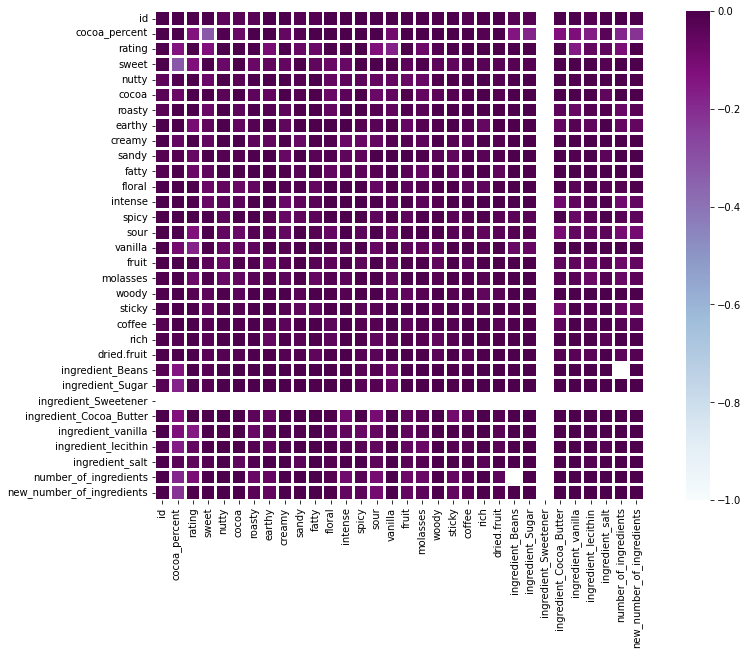

In [78]:
plt.figure(figsize=(15, 9))
sns.heatmap(chocolate_df.corr(),cmap='BuPu',vmin=-1,vmax=0,square=True,linewidths=2, linecolor='white')

# **Positively correlated**

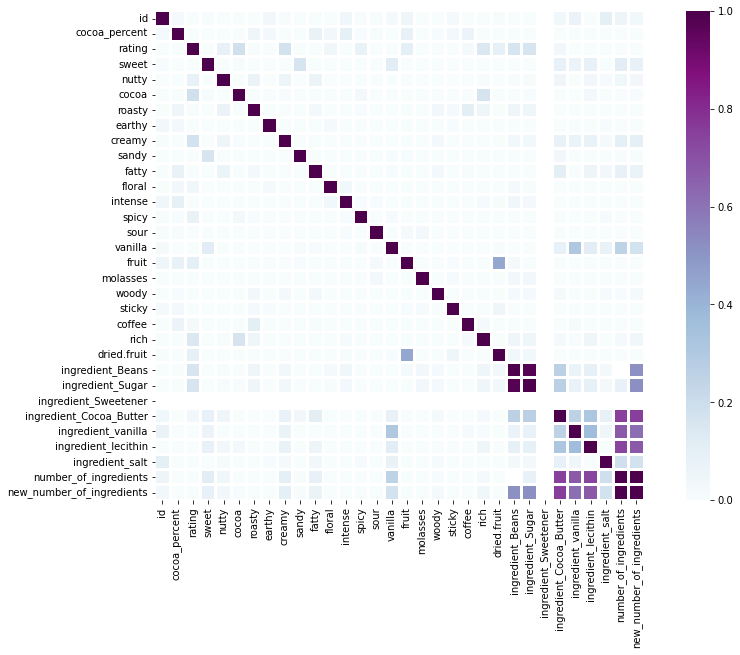

In [72]:
plt.figure(figsize=(15, 9))
sns.heatmap(chocolate_df.corr(),cmap='BuPu',vmin=0,vmax=1,square=True,linewidths=2, linecolor='white')

In [38]:
chocolate_df.corr()

,id,cocoa_percent,rating,sweet,nutty,cocoa,roasty,earthy,creamy,sandy,...,dried.fruit,ingredient_Beans,ingredient_Sugar,ingredient_Sweetener,ingredient_Cocoa_Butter,ingredient_vanilla,ingredient_lecithin,ingredient_salt,number_of_ingredients,new_number_of_ingredients
id,1.000000,0.022884,-0.010549,0.005916,-0.039959,-0.032248,-0.031114,0.036589,0.009147,-0.017215,...,0.009585,-0.023465,-0.024546,NaN,0.032176,0.069486,-0.021957,0.104357,0.054290,0.033472
cocoa_percent,0.022884,1.000000,-0.135079,-0.317496,-0.012136,-0.066640,0.050074,0.029245,-0.056650,-0.019947,...,-0.002248,-0.140690,-0.178011,NaN,-0.126203,-0.120472,-0.162780,-0.032133,-0.186584,-0.217047
rating,-0.010549,-0.135079,1.000000,-0.123929,0.087402,0.184587,0.009410,-0.102112,0.174882,-0.063230,...,0.092840,0.163996,0.161274,NaN,0.038752,-0.155154,-0.052455,-0.049590,-0.109737,-0.003908
sweet,0.005916,-0.317496,-0.123929,1.000000,-0.070556,0.004954,-0.066870,-0.049798,-0.051936,0.160987,...,-0.031133,-0.024152,-0.020706,NaN,0.089225,0.061210,0.085091,-0.016260,0.114194,0.082996
nutty,-0.039959,-0.012136,0.087402,-0.070556,1.000000,-0.033030,0.068134,-0.001825,0.052414,-0.018492,...,-0.023091,0.005278,0.007879,NaN,0.049679,-0.014571,0.037943,0.014080,0.039412,0.035913
cocoa,-0.032248,-0.066640,0.184587,0.004954,-0.033030,1.000000,-0.042872,-0.053637,0.005795,-0.021521,...,-0.021893,0.003570,0.006931,NaN,-0.002698,-0.002936,0.027518,-0.047349,0.002961,0.004343
roasty,-0.031114,0.050074,0.009410,-0.066870,0.068134,-0.042872,1.000000,-0.021202,-0.041648,-0.009071,...,-0.004316,0.049014,0.050475,NaN,-0.039820,-0.065682,-0.021491,-0.015070,-0.068038,-0.032503
earthy,0.036589,0.029245,-0.102112,-0.049798,-0.001825,-0.053637,-0.021202,1.000000,-0.048163,-0.000336,...,-0.005170,-0.007762,-0.005407,NaN,-0.056235,-0.026663,-0.047064,0.005442,-0.059065,-0.053569
creamy,0.009147,-0.056650,0.174882,-0.051936,0.052414,0.005795,-0.041648,-0.048163,1.000000,-0.064772,...,-0.016988,0.033253,0.034815,NaN,0.076696,0.072762,0.078452,0.018359,0.100110,0.102233
sandy,-0.017215,-0.019947,-0.063230,0.160987,-0.018492,-0.021521,-0.009071,-0.000336,-0.064772,1.000000,...,-0.013045,-0.001410,0.000734,NaN,0.037074,-0.014054,0.003140,-0.035320,0.011380,0.008831
